# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [ ]:
#importing the datasets
#count_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Recommendation Systems/capstone/count_data.csv')
#song_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Recommendation Systems/song_data.csv')

count_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Obvservations**


* count df has an unnamed:0 column that seems like a redudnant index we can remove. otherwise it's straightforward with user and song ID strings and a play count numeric value associated for each user & song pair.
* Song df has more information about each song, with the unique song ID identifier and then further information on the song, artist album it came out in, etc.



### **Let us check the data types and and missing values of each column**

In [ ]:
print("The number of unique users in count df is",count_df['user_id'].nunique())
print("The number of unique songs in song df is",count_df['song_id'].nunique())

The number of unique users in count df is 76353
The number of unique songs in song df is 10000


In [ ]:
count_df.shape

(2000000, 4)

In [ ]:
song_df.shape

(1000000, 5)

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
song_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000000.0,1030.325652,998.745002,0.0,0.0,1969.0,2002.0,2011.0


**Observation**
It seems like we have some 0 values in the year - may want to clean this up later on if we wanted to use year to recommend songs to users (e.g. someone who only seems to like oldies, or someone who only likes new songs)

In [ ]:
count_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000000.0,999999.500000,577350.413528,0.0,499999.75,999999.5,1499999.25,1999999.0
play_count,2000000.0,3.045485,6.579720,1.0,1.00,1.0,3.00,2213.0


**Observation**
Most songs appear to be played between 1-3 times with some outlier(s) of over 2k times. This may skew the data (e.g. if we recommend based on # of plays) so we may want to look into this to adjust accordingly.

In [ ]:
#checking for duplicate entries in song df. We should be able to drop duplicate entries
song_df[song_df.duplicated()]

,song_id,title,release,artist_name,year
18309,SOPFBUZ12AF729C896,Spitting Games,Final Straw,Snow Patrol,2003
32760,SOJHKXX12A8C139798,A Crow Left Of The Murder,Live in Malaysia 2004,Incubus,2004
54218,SONVJUL12A6701FB7A,The Damage In Your Heart,Make Believe,Weezer,2005
73174,SORBGBD12A8C141CEA,Weight Of The World,The Open Door,Evanescence,2006
83415,SONLOQQ12A8C139AF9,Go To Sleep,Hail To The Thief,Radiohead,2003
...,...,...,...,...,...
997476,SOCGXXL12B0B808865,Yesterdays,Greatest Hits,Guns N' Roses,1991
998785,SOEUIVS12A8C1400E3,Someone Put Your Hand Out,King Of Pop,Michael Jackson,1992
999365,SORANLE12A6310DBC8,Long Way To Go,Love Angel Music Baby,Gwen Stefani / Andre 3000,0
999643,SOAPUFN12AB017FF03,Suggestions,System Of A Down (Bonus Pack),System of a Down,1998


In [ ]:
#Just checking one example of a duplicated song
song_df.loc[song_df['song_id'] == 'SODNVTM12A6D4FA448']


,song_id,title,release,artist_name,year
766340,SODNVTM12A6D4FA448,Ruled By Secrecy,Absolution,Muse,0
999740,SODNVTM12A6D4FA448,Ruled By Secrecy,Absolution,Muse,0


In [ ]:
song_df.drop_duplicates()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


#### **Observations and Insights:_____________**
* We got rid of duplicate entires in the song data frame 
* Identified an unnamed 0 column in the song dataframe that can be dropped

**Other data obvervations were:**
* We saw some "zero" entries in the year value of the song release date
* Play counts are typically <5 but saw some potential outliers

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
count_song_df=pd.merge(count_df,song_df,on="song_id",how="inner")

In [ ]:
# Drop the column 'Unnamed: 0'
count_song_df=count_song_df.drop(columns=['Unnamed: 0'])

count_song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086946 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 127.4+ MB


In [ ]:
count_song_df.describe().T

,count,mean,std,min,25%,50%,75%,max
play_count,2086946.0,3.031582,6.550493,1.0,1.0,1.0,3.0,2213.0
year,2086946.0,1636.512499,772.409985,0.0,1985.0,2003.0,2007.0,2010.0


In [ ]:
count_df.loc[count_df['play_count'] > 1000]

,Unnamed: 0,user_id,song_id,play_count
1228366,1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213


In [ ]:
#this seems to be an outlier for playcount, as the 75th percentile is 3 so couldl choose later on to remove it
#count_df = count_df[count_df['play_count']<1000]

**Observation**
This user/song play count of 2k+ seems to be an outlier for playcount, as the 75th percentile is 3. Could choose later on to remove it

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

The `user_id` and `song_id` are encrypted and don't hold much meaning in their string values so we can encode them into a simple numeric feature for clarity 



In [ ]:
# Apply label encoding for "user_id" and "song_id"

#LabelEncoder
from sklearn import preprocessing
ule = preprocessing.LabelEncoder()
sle = preprocessing.LabelEncoder()
users_enc=ule.fit_transform(count_song_df.user_id)
songs_enc=sle.fit_transform(count_song_df.song_id)

In [ ]:
#create a new DF where we will replace w the encoded ones
count_song_copy_df= count_song_df.copy()
count_song_df['user_id']=users_enc
count_song_df['song_id']=songs_enc

count_song_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,37056,153,1,The Cove,Thicker Than Water,Jack Johnson,0
2,35091,153,3,The Cove,Thicker Than Water,Jack Johnson,0
3,10905,153,1,The Cove,Thicker Than Water,Jack Johnson,0
4,18917,153,6,The Cove,Thicker Than Water,Jack Johnson,0


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

We will remove users with a low song play count and songs with few user interactions for efficiency in building the recommendation systems since we won't be able to derive enough information from songs or users with low play counts (it could be that people don't like them but it may also be they are new to the system!)

In [ ]:
# Get the column containing the users
users = count_song_df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = count_song_df.loc[~count_song_df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
counted = count_df.groupby('play_count').count()['user_id'].to_frame()

## **Exploratory Data Analysis**

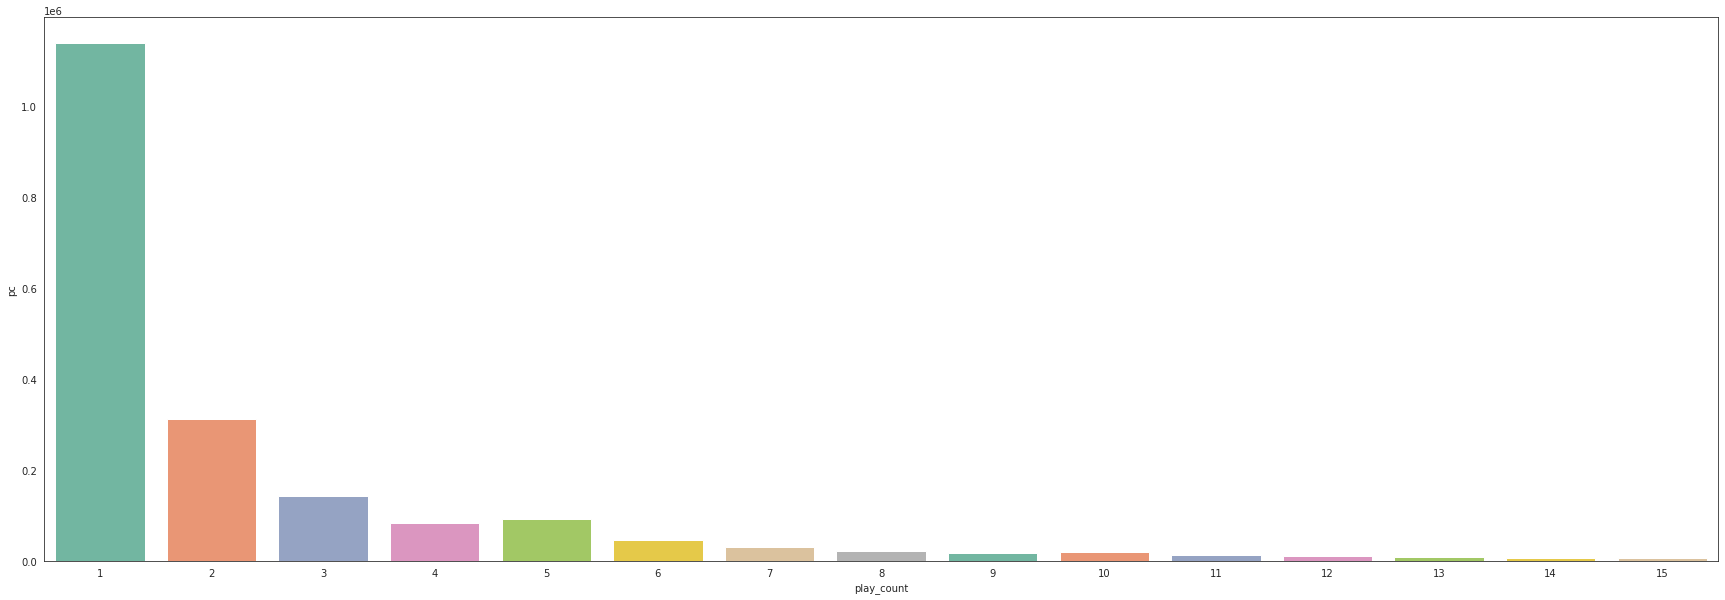

In [ ]:
counted = counted.head(15)
plt.figure(figsize=(30,10))
sns.set_style('white')
sns.barplot(x = counted.index,
            y = 'user_id',
            data = counted,
            estimator = np.median,
            palette="Set2")
plt.ylabel('pc') 
# Show the plot
plt.show()

In [ ]:
df_final.shape

(170214, 7)

In [ ]:
# Drop records with play_count more than(>) 5
df_final= df_final[df_final["play_count"] <= 5]

#personally not a big fan of this recommendation - if we are trying to use play count as rating, 
#then we could map play_count to 1-5 range, or even simply set that anything over a rating of 5=5
#dropping those rows doesn’t make as much sense to me at this point. 
#Since this what seems to be recommended as a guidelinein the notebook I will do that
#but may consider changing it for the next one
#and will make sure to update the rating scale and threshold values accordingly

In [ ]:
df_final.shape

(154377, 7)

Then again we still retain over 90% of rows with play counts

In [ ]:
# Some more data observations for clarity, picking Muse as an example
muse_df = df_final[df_final['artist_name']=='Muse']
muse_df.head(10)


,user_id,song_id,play_count,title,release,artist_name,year
206874,56576,208,1,Uprising,Uprising,Muse,0
206875,49549,208,3,Uprising,Uprising,Muse,0
206878,8074,208,2,Uprising,Uprising,Muse,0
206889,37938,208,3,Uprising,Uprising,Muse,0
206897,9097,208,2,Uprising,Uprising,Muse,0
206899,19193,208,1,Uprising,Uprising,Muse,0
206904,23297,208,2,Uprising,Uprising,Muse,0
206907,38362,208,2,Uprising,Uprising,Muse,0
206911,41101,208,3,Uprising,Uprising,Muse,0
206917,26149,208,2,Uprising,Uprising,Muse,0


In [ ]:
# we can see how much each song has been played
muse_df[['title','play_count']].groupby(['title'],sort=True).sum()

,play_count
title,
Can't Take My Eyes Off You,158
Do We Need This?,234
Invincible,230
Map Of The Problematique,368
Resistance,576
Starlight,218
Stockholm Syndrome,270
Supermassive Black Hole (Album Version),912
Supermassive Black Hole (Twilight Soundtrack Version),912


### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print("The number of unique users in count df is",df_final['user_id'].nunique())

The number of unique users in count df is 3476


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print("The number of unique songs in count df is",df_final['song_id'].nunique())

The number of unique songs in count df is 695


Total number of unique artists

In [ ]:
# Display total number of unique artists
print("The number of unique songs in count df is",df_final['artist_name'].nunique())

The number of unique songs in count df is 258


#### **Observations and Insights:__________**

After cleaning up the data we have **3476** users, and **695** which could yield about **2M** "play counts" 


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

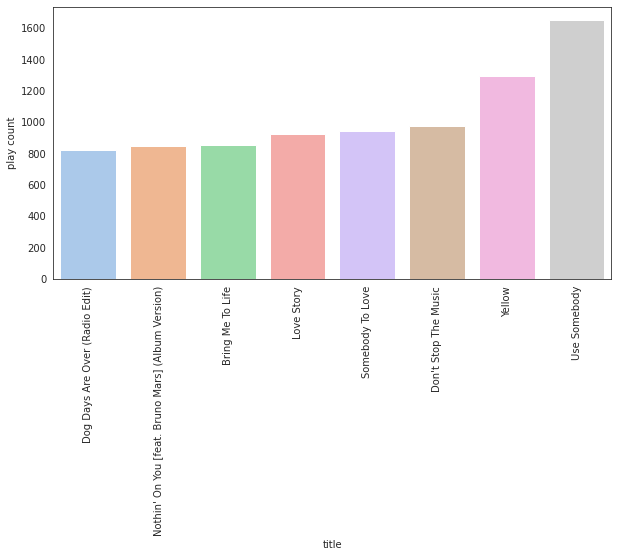

In [ ]:
count_titles = df_final.groupby('title').count()['play_count'].to_frame().sort_values(by='play_count')
count_t = pd.DataFrame(count_titles)
#count.drop(count.index[0], inplace=True)
count_t = count_t.tail(8)

plt.figure(figsize=(10,5))
sns.barplot(x = count_t.index,
            y = 'play_count',
            data = count_t,
            estimator = np.sum,
            palette='pastel')
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.ylabel('play count') 
# Show the plot
plt.show()

Users who play the most songs


In [ ]:
count_users = df_final.groupby('user_id').sum()['play_count'].to_frame().sort_values(by='play_count')
count_u = pd.DataFrame(count_users)
#count.drop(count.index[0], inplace=True)
count_u = count_u.tail(10)
count_u

,play_count
user_id,
23337,444
27401,458
61472,458
43041,469
75144,473
62759,485
37049,485
15733,508
31704,515



Users with the most interactions

In [ ]:
df_final['user_id'].value_counts().to_frame().head(10)

,user_id
61472,311
37049,267
15733,243
75144,237
9570,212
10763,210
23337,204
31704,201
43041,200
37851,197


In [ ]:
count_users = df_final.groupby('user_id').sum()['play_count'].to_frame().sort_values(by='play_count')
count_u = pd.DataFrame(count_users)
#count.drop(count.index[0], inplace=True)
count_u = count_u.tail(10)
count_u

,play_count
user_id,
23337,444
27401,458
61472,458
43041,469
75144,473
62759,485
37049,485
15733,508
31704,515


Songs released in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,9515
2007,17510
2008,18619
2009,19856
2010,5541


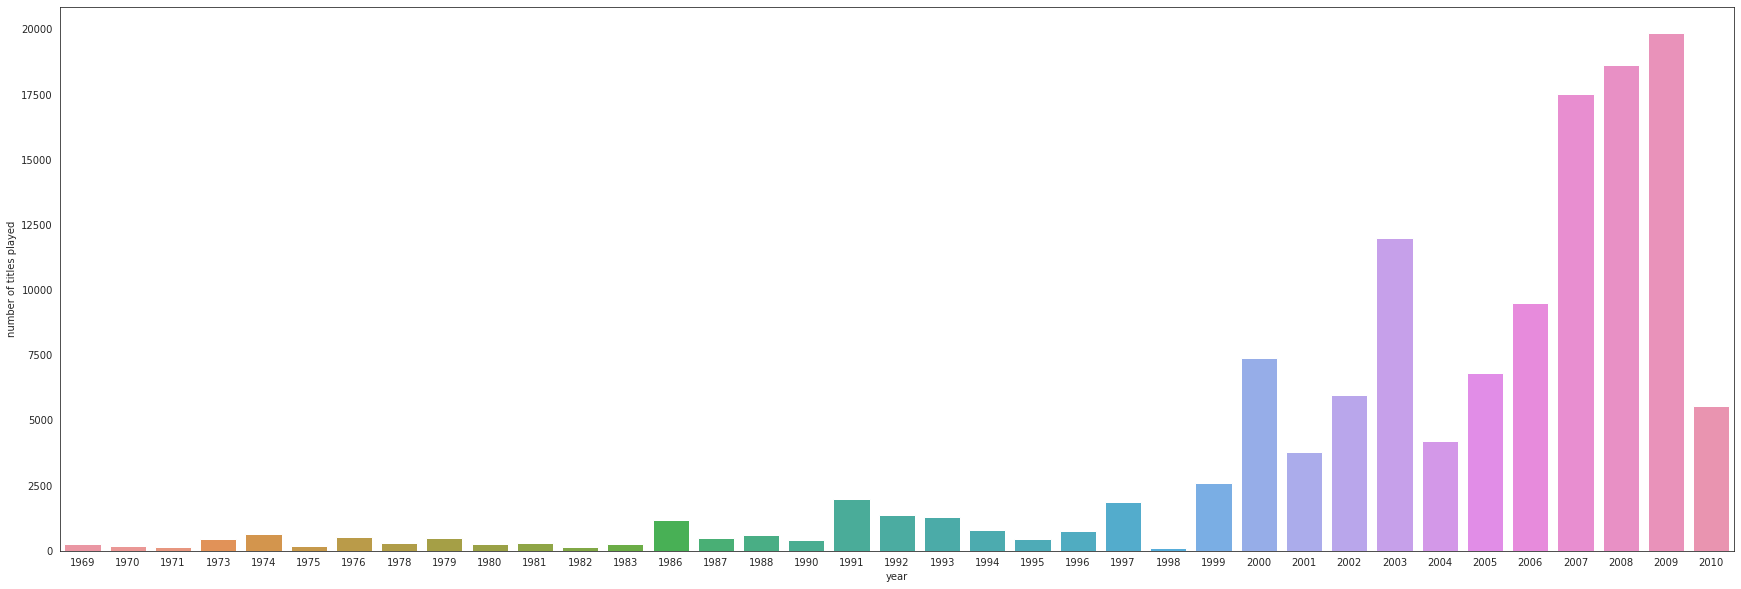

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

In [ ]:
# most played artists
count_songs = df_final.groupby('artist_name').count()['play_count'].to_frame().sort_values(by='play_count', ascending=False)
count = pd.DataFrame(count_songs)
#count.drop(count.index[0], inplace=True)
count.head()

,play_count
artist_name,
Coldplay,6785
Kings Of Leon,6210
The Killers,4776
The All-American Rejects,3286
Florence + The Machine,3097


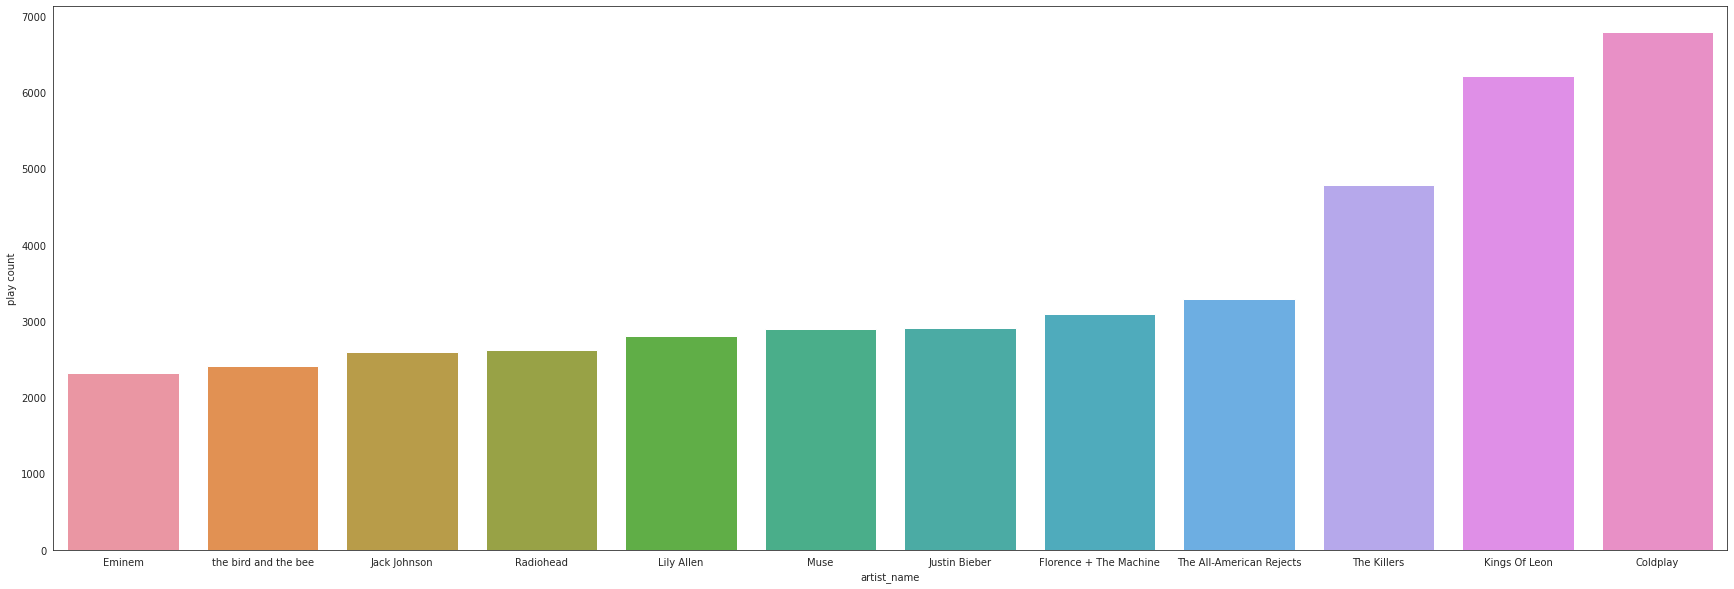

In [ ]:
count_artists = df_final.groupby('artist_name').count()['play_count'].to_frame().sort_values(by='play_count')
count_a = pd.DataFrame(count_artists)
#count.drop(count.index[0], inplace=True)
count_a = count_a.tail(12)

plt.figure(figsize=(30,10))
sns.barplot(x = count_a.index,
            y = 'play_count',
            data = count_a,
            estimator = np.sum)
plt.ylabel('play count') 
# Show the plot
plt.show()

In [ ]:
df_final.to_csv('/content/drive/MyDrive/ColabNotebooks/capstone/recSystems_df_final2.csv')

#### **Observations and Insights:__________** # 
* Florence and the Machine and Coldplay are hands-down the most played artists
* We can derive other interesting insights from the data, about the songs, artists, albums, like which year were most songs in the data released, what are the artists with most songs, etc
* Most artists in the top list I'm familiar with with some exceptions (like Harmonia). Some quick online research doesn't seem also to suggest they should be some of the top artists (not that I would know all of them) but good to keep in mind later on for sanity check

**Think About It:** What other insights can be drawn using exploratory data analysis?

other things we could look at would be
* 10 most played albums  (not by play count but by user)
* Artist with the most songs

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
We will explore different recommendation systems models, from simple to more complex such as:
Popularity-Based Recommendation Systems
User-User Similarity-Based Collaborative Filtering
Model Based Collaborative Filtering - Matrix Factorization
Cluster & Content Based Recommendation System
If time permits, hybrid or deep content based


**Overall solution design** - What is the potential solution design?<br>

* Build the recommendation systems proposed above to find the top 'n' songs for a user
* We will use the Surprise library in python to build similarity based collaborative filtering. 
* Implement the matrix factorization approach applying SVD to predict play counts
* Create a function to recommend songs to the users based on predicted play counts for each song.
* Perform hyperparameter tuning of the models using GridSearchCV
* Use precision@k, recall@k, F1-Score@k and RMSE as metrics for model performance evaluation

**Measures of success**- What are the key measures of success to compare different potential technqiues?<br>
We will be looking at 
* precision@k 
* recall@k 
* F_1 score (using above)
* RMSE

**Some definitions**
Relevant item - An item (song in this case) that is actually rated higher than the threshold rating (here 1.5) is relevant, if the actual rating is below the threshold then it is a non-relevant item.
Recommended item - An item that's predicted rating is higher than the threshold (here 1.5) is a recommended item, if the predicted rating is below the threshold then that song will not be recommended to the user.

False Negative (FN) - It is the frequency of relevant items that are not recommended to the user. If the relevant items are not recommended to the user, then the user might not find new songs they enjoy to play.
This would result in the user navigating away from the platform or simply having an “un pleasurable” music experience and not trusting the service for music recommendations.

False Positive (FP) - It is the frequency of recommended items that are actually not relevant. In this case, the recommendation system is not doing a good job of finding and recommending relevant songs to the user. This would result in inefficient use of resources from the service provided which they would also like to minimize.

Recall - It is the fraction of actually relevant songs that are recommended to the user i.e. if out of 10 relevant songs, 6 are recommended to the user then recall is 0.60. The higher the value of recall the better our mode is.

Precision - It is the fraction of recommended songs that are actually relevant i.e. if out of 10 recommended songs, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. 


# **Music Recommendation System**

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems

**Note:** Use the shorter version of the data i.e. the data after the cutoffs as used in Milestone 1.

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [ ]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/song_data.csv')


In [ ]:
#loading the file with the filters and data treatment applied in milestone 1
df_final = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/capstone/recSystems_df_final2.csv')

In [ ]:
df_final.shape

(154377, 7)

In [ ]:
df_final.nunique()

user_id        3476
song_id         695
play_count        5
title           704
release         484
artist_name     258
year             38
dtype: int64

In [ ]:
#df_final.drop(columns=['Unnamed: 0'], inplace=True)
df_final.drop_duplicates(inplace=True)
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
355,39814,736,1,Stronger,Graduation,Kanye West,2007
361,57932,736,1,Stronger,Graduation,Kanye West,2007
369,19193,736,1,Stronger,Graduation,Kanye West,2007
381,3919,736,2,Stronger,Graduation,Kanye West,2007
409,51414,736,2,Stronger,Graduation,Kanye West,2007


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148338 entries, 355 to 2051850
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      148338 non-null  int64 
 1   song_id      148338 non-null  int64 
 2   play_count   148338 non-null  int64 
 3   title        148338 non-null  object
 4   release      148338 non-null  object
 5   artist_name  148338 non-null  object
 6   year         148338 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 9.1+ MB


In [ ]:
#Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count'] #Hint: Use groupby function on the song_id column. 

#Calculating the frequency a song is played.
play_freq = df_final.groupby('song_id').count()['play_count']#Hint: Use groupby function on the song_id column

In [ ]:
#Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
final_play.tail()

,avg_count,play_freq
song_id,,
9939,1.662551,243
9942,2.472050,161
9960,1.622378,143
9981,1.880240,167
9989,1.341463,123


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
#Build the function for finding top n songs
def top_n_songs(data, n, min_interaction=50):
    
    #Finding movies with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)
    
    return recommendations.index[:n]

In [ ]:
#Recommend top 10 songs using the function defined above
top10=list(top_n_songs(final_play, 10, 50))

In [ ]:
top10songs = df_final.loc[df_final['song_id'].isin(top10)].groupby(['title','artist_name']).count()['play_count'].to_frame().sort_values(by='play_count', ascending=False)
top10songs

,,play_count
title,artist_name,
Secrets,OneRepublic,684
You're The One,Dwight Yoakam,411
Luvstruck,Southside Spinners,162
Greece 2000,Three Drives,161
Video Killed The Radio Star,The Buggles,132
Brave The Elements,Colossal,115
Transparency,White Denim,112
Victoria (LP Version),Old 97's,111
The Big Gundown,The Prodigy,103


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity based and subsequent models we will use the "surprise" library.

In [ ]:
#Install the surprise package using pip. Uncomment and run the below code to do the same. 
!pip install surprise 

     |████████████████████████████████| 11.8 MB 8.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630166 sha256=e33ba746e4bc61e6a1d93af4b973755372d04d5bbef27d8fb1b660c128f2cab2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

The below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
#The function to calulate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value 1.5? 

Setting the threshold at 1.5 assumes that if a person plays a song more 
than once it's because they like it

---



In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0,5)

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) #Take only "user_id","song_id", and "play_count"

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42) # Take test_size=0.4

In [ ]:
trainset.all_users()[-1]

3470

**Think About It:** How changing the test size would change the results and outputs?

Test sizes of .1-.4 would be common. If it were a very large data set we could probably do .1 but since it's a smaller one, .6 makes sense to avoid overfitting to our validation set.

In [ ]:
0#Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1) #use random_state=1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user) #Use sim_user_user model

RMSE: 1.0707
Precision:  0.403
Recall:  0.711
F_1 score:  0.514


**Observations and Insights:**


* We calculated the RMSE to check how far the overall predicted ratings are from the actual ratings.
* Intuition of Recall - We are getting a recall of 0.714, which means out of all the relevant songs 71% are recommended.
* Intuition of Precision - We are getting a precision of ~ 0.4, which means out of all the recommended songs, 40% are relevant (which is not too great!)
* The F_1 score of the baseline model is ~0.518. It indicates that mostly recommended songs were relevant and relevant movies were recommended but we can definitely seek to improve this.



In [ ]:
data.df.loc[data.df['user_id']==6958].loc[data.df['song_id']==1671]

,user_id,song_id,play_count
177727,6958,1671,2


In [ ]:
#predicting play_count for a sample user with a listened song.
p = sim_user_user.predict(6958, 1671, r_ui=2,verbose=True) #use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.82   {'actual_k': 40, 'was_impossible': False}


In [ ]:

data.df.loc[data.df['user_id']==6958].loc[data.df['song_id']==3232]

,user_id,song_id,play_count


In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958,3232, verbose=True) #Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.78   {'actual_k': 34, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.7791119099433816, details={'actual_k': 34, 'was_impossible': False})

In [ ]:
df_final.loc[df_final['song_id']==1671].head(1)

,user_id,song_id,play_count,title,release,artist_name,year
177727,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [ ]:
df_final.loc[df_final['song_id']==3232].head(1)

,user_id,song_id,play_count,title,release,artist_name,year
132389,27018,3232,2,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008


**Observations and Insights:**


* The model would appear to recommend both a song that a user likes (Sleeping In by the Postal Service), and one they are likely to enjoy by Coldplay which makes sense given the artists' styles. 
* The above output shows that the actual rating is not too far from the predicted rating for this user-item pair (it made it over the threshold at least!)



Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid1 = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

param_grid2 = {'k': [25, 30, 35, 40], 'min_k': [9, 12],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }              

param_grid3 = {'k': [30, 35], 'min_k': [15],
              'sim_options': {'name': ["pearson_baseline"],
                              'user_based': [True], "min_support":[0,2]}
              }                  

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid3, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data) #Use entire data for GridSearch

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.000109141122527
{'k': 35, 'min_k': 15, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 0}}


**RESULTS FROM PARAM GRID 1**

> 0.978482419730421
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}

**RESULTS FROM PARAM GRID 2**

> 0.9999209108797182
{'k': 35, 'min_k': 12, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}

**RESULTS FROM PARAM GRID 3**

> 0.9753996631042042
{'k': 35, 'min_k': 15, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 0}}




In [ ]:
# Train the best model found in above gridsearch.
# using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support':0}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=35, min_k=15, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0053
Precision:  0.435
Recall:  0.771
F_1 score:  0.556


**Observations and Insights:_________**
* Tried a few different sim options and hyperparameters, managed to improve from the base model lowering the RMSE and increasing the F1 score slightly

In [ ]:
#Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui=2
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.907135255647403, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
#Predict the play count for a song that is not listened by the user (with user_id 6958) -> 3232
sim_user_user_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6952989820453472, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations and Insights:______________**
* The actual and predicted song play count for the song the user has listened to got closer with this optimized model. 

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain user?

In [ ]:
#Use inner id 0. 
sim_user_user_optimized.get_neighbors(0, k=5)

[2450, 834, 213, 1681, 86]

In [ ]:
def top_n_songs_for_user(innerUserId, n=5):
  rawID=trainset.to_raw_uid(innerUserId)
  return df_final.loc[df_final['user_id']==rawID].groupby(['song_id', 'title','artist_name'])['play_count'].sum().to_frame().sort_values(by='play_count', ascending=False).head(n)
  

In [ ]:
top_n_songs_for_user(0)

,,,play_count
song_id,title,artist_name,
2220,Sehr kosmisch,Harmonia,5
2091,Just Dance,Lady GaGa / Colby O'Donis,4
2210,Hey There Delilah,Plain White T's,4
630,'Till I Collapse,Eminem / Nate Dogg,4
3050,Terre Promise,O'Rosko Raricim,3


In [ ]:
top_n_songs_for_user(575)

,,,play_count
song_id,title,artist_name,
7715,Savin' Me,Nickelback,8
4975,Until The End Of Time,Justin Timberlake duet with Beyonce,4
2276,Far Away (Album Version),Nickelback,4
8582,Use Somebody,Kings Of Leon,4
4448,Fireflies,Charttraxx Karaoke,4


In [ ]:
top_n_songs_for_user(731)

,,,play_count
song_id,title,artist_name,
5728,My Name Is,Eminem,4
4298,On Repeat,LCD Soundsystem,3
1811,Ghosts 'n' Stuff (Original Instrumental Mix),Deadmau5,2
2615,She's Good For Business,MSTRKRFT,2
2747,Kut-Off,Skream,2


Below we will be implementing a function where the input parameters are - 

- data: a **song** dataset
- user_id: a user id **against which we want the recommendations**
- top_n: the **number of songs we want to recommend**
- algo: the algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
df_f=df_final[['user_id','song_id','play_count']]
df_f.head()
df_f.drop_duplicates(inplace=True)

In [ ]:
df_f.shape

(137886, 3)

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended product ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns=['song_id'], values='play_count')
    
    
    # extracting  song ids which the user_id has not played yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est
        
        # appending the predicted ratings
        recommendations.append((item_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating products for this user

In [ ]:
#Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.
recommendations =get_recommendations(df_f, 6958, 5, sim_user_user_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5398,2.573805
1,1348,2.519339
2,7496,2.499019
3,5943,2.492109
4,1286,2.480112


In [ ]:
sFrame = pd.DataFrame()
songs = [614,8247,5943,7682,5531]
for s in songs:
  #sid = trainset.to_raw_iid(s)
  sFrame=sFrame.append(df_final.loc[df_final['song_id'] == s].head(1))

sFrame[['song_id','title','artist_name']]

,song_id,title,artist_name
69686,614,You're The One,Dwight Yoakam
343711,8247,Tighten Up,The Black Keys
565492,5943,You've Got The Love,Florence + The Machine
748356,7682,I'm Sleeping In A Submarine,Arcade Fire
93221,5531,Secrets,OneRepublic


In [ ]:
top_n_songs_for_user(trainset.to_inner_uid(6958), 20)

,,,play_count
song_id,title,artist_name,
1050,Wet Blanket,Metric,5
5566,The Bachelor and the Bride,The Decemberists,5
9351,The Police And The Private,Metric,2
3718,The Penalty,Beirut,2
1671,Sleeping In (Album),Postal Service,2
1787,Help I'm Alive,Metric,2
8029,I CAN'T GET STARTED,Ron Carter,1
7738,Nantes,Beirut,1
8037,Gold Guns Girls,Metric,1


**Observations and Insights:______________**
* Bit suprised to not see songs from artists the user enjoys but given the type of musical style still possible.
* Also suprising that all have ratings under 3 but still since our assumption is anything over 1 play count means a suer likes a song, anything with a value over 2 should be promising

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings',ascending=False)
  
  return ranked_songs
  #note to self instead of play_freq may be play_count

**Think About It:** In the above function to make the correction in the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

Note: In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions, but here we don't necessarily need to encourage people to play a song, and we've eliminated songs with very few ratings "i.e" play counts, whereas we have songs with play couunts of 5 and we don't want any to have more than 5.

In [ ]:
#Applying the ranking_songs function on the final_play data. 
ranked_songs = ranking_songs(recommendations, final_play)
ranked_songs

,song_id,play_freq,predicted_ratings,corrected_ratings
4,5398,300,2.573805,2.516070
1,1348,490,2.519339,2.474164
0,1286,940,2.480112,2.447495
2,5943,447,2.492109,2.444810
3,7496,316,2.499019,2.442765


In [ ]:
sFrame = pd.DataFrame()
songs = [614,8247,5943,5531,7682]
for s in songs:
  #sid = trainset.to_raw_iid(s)
  sFrame=sFrame.append(df_final.loc[df_final['song_id'] == s].head(1))

sFrame[['song_id','title','artist_name']]

,song_id,title,artist_name
69686,614,You're The One,Dwight Yoakam
343711,8247,Tighten Up,The Black Keys
565492,5943,You've Got The Love,Florence + The Machine
93221,5531,Secrets,OneRepublic
748356,7682,I'm Sleeping In A Submarine,Arcade Fire


**Observations and Insights:**
* There were no differences between the recommendations with the corrected ratings, just the order changed slightly

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.
sim_options = {'name': 'cosine',
               'user_based': False}

#KNN algorithm is used to find desired similar items.
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =10.
precision_recall_at_k(sim_item_item, k=10)

RMSE: 1.0212
Precision:  0.327
Recall:  0.436
F_1 score:  0.374


**Observations and Insights:______________**
* This Item-Item recommendation engine underperforms compared to the user-user model significantly 

In [ ]:
data.df.loc[data.df['user_id']==6958].loc[data.df['song_id']==1671]

,user_id,song_id,play_count
177727,6958,1671,2


In [ ]:
#predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user.
sim_item_item.predict(6958,1671,r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.40   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.404022400965297, details={'actual_k': 28, 'was_impossible': False})

In [ ]:
data.df.loc[data.df['user_id']==69587].loc[data.df['song_id']==1671]

,user_id,song_id,play_count


In [ ]:
#Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(69587,1671, verbose=True)

user: 69587      item: 1671       r_ui = None   est = 1.46   {'actual_k': 23, 'was_impossible': False}


Prediction(uid=69587, iid=1671, r_ui=None, est=1.45698954895159, details={'actual_k': 23, 'was_impossible': False})

**Observations and Insights:______________**
* While still predicting that this user may like these songs, the estimates are lower for both. Given we know this user "likes" song 1671 (the postal service one) just something to be wary of

In [ ]:
#Apply grid search for enhancing model performance

# setting up parameter grid to tune the hyperparameters
param_grid1 = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

param_grid2 = {'k': [30], 'min_k': [6, 9],
              'sim_options': {'name': ['pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2],'shrinkage':[50,80]}
              }   

param_grid3 = {'k': [30], 'min_k': [6],
              'sim_options': {'name': ["pearson_baseline"],
                              'user_based': [False], 
                              "min_support":[0,2],
                              'shrinkage':[80,90,100]}
              }                               

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid3, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.9865228748859814
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 0, 'shrinkage': 100}}


**Results with param grid 1** are
0.9857056770027918

> {'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}

**Results with param grid 2** are
0.9861578252605048
>  {'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2, 'shrinkage': 80}}


**Results with param grid 3** are
0.9636829605330276
> {'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 0, 'shrinkage': 100}}

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameter [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

Fromt the documentation 

> **Similarity measure configuration**
Many algorithms use a similarity measure to estimate a rating. The way they can be configured is done in a similar fashion as for baseline ratings: you just need to pass a sim_options argument at the creation of an algorithm. This argument is a dictionary with the following (all optional) keys:

* `'name': `The name of the similarity to use, as defined in the similarities module. Default is 'MSD'.
* `'user_based':` Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.
*`'min_support':` The minimum number of common items (when 'user_based' is 'True') or minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero. Simply put, if |𝐼𝑢𝑣|<min_support then sim(𝑢,𝑣)=0. 
The same goes for items.

* `'shrinkage':` Shrinkage parameter to apply (only relevant for pearson_baseline similarity). Default is 100.


In [ ]:
#Apply the best model found in the grid search.

# using the optimal similarity measure for item-item based collaborative filtering
#TODO FILL IN THE RIGHT SIM OPTIONS
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 0,
               'shrinkage':100}

#TODO FILL IN THE RIGHT SIM OPTIONS
# creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_item_item_optimized, k=10)


RMSE: 0.9912
Precision:  0.455
Recall:  0.583
F_1 score:  0.511


**Observations and Insights:**
* achieved a lower RMSE and significantly improved the F_1 score compared to the baseline item-item similarity model. 

In [ ]:
#Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(uid=6958, iid=1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.02   {'actual_k': 12, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.0185070905732365, details={'actual_k': 12, 'was_impossible': False})

In [ ]:
#predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user.
sim_item_item_optimized.predict(uid=6958, iid=3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.03   {'actual_k': 12, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.025218552138185, details={'actual_k': 12, 'was_impossible': False})

**Observations and Insights:______________**
* The estimate for the known song improved (closer to actual value) and for the unkown song to the user decreased.

In [ ]:
#Find five most similar users to the user with inner id 0
sim_item_item_optimized.get_neighbors(0, k=5)


[426, 85, 197, 174, 242]

In [ ]:
top_n_songs_for_user(0, 10)

,,,play_count
song_id,title,artist_name,
2220,Sehr kosmisch,Harmonia,5
2091,Just Dance,Lady GaGa / Colby O'Donis,4
2210,Hey There Delilah,Plain White T's,4
630,'Till I Collapse,Eminem / Nate Dogg,4
3050,Terre Promise,O'Rosko Raricim,3
1334,Hey_ Soul Sister,Train,3
8099,Toxic,Britney Spears,3
1828,Times Like These,Jack Johnson,3
2616,Gives You Hell,The All-American Rejects,3


In [ ]:
top_n_songs_for_user(229, 10)

,,,play_count
song_id,title,artist_name,
7796,Love Story,Taylor Swift,8
8582,Use Somebody,Kings Of Leon,8
7998,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B,6
4270,Don't Stop The Music,Rihanna,6
657,Luvstruck,Southside Spinners,5
6448,Wild World,Cat Stevens,5
6450,Brave The Elements,Colossal,5
7969,Savior,Rise Against,5
6860,Mercy:The Laundromat,Pavement,5


In [ ]:
top_n_songs_for_user(239,10)

,,,play_count
song_id,title,artist_name,
6293,Yellow,Coldplay,6
1286,Somebody To Love,Justin Bieber,6
7998,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B,6
2048,Already Gone,Kelly Clarkson,5
5733,Face Down (Album Version),The Red Jumpsuit Apparatus,5
8698,Whatcha Say,Jason Derulo,4
3310,Yeah!,Usher Featuring Lil' Jon & Ludacris,4
1223,The Way I Are,Timbaland / Keri Hilson / D.O.E.,4
1118,Clocks,Coldplay,4


In [ ]:
#197,
top_n_songs_for_user(286,10)

,,,play_count
song_id,title,artist_name,
6293,Yellow,Coldplay,6
8612,Fix You,Coldplay,5
7989,Drive,Incubus,4
7796,Love Story,Taylor Swift,4
9081,Take Me Out,Franz Ferdinand,4
4639,Bulletproof,La Roux,4
2220,Sehr kosmisch,Harmonia,4
4522,Sparks,Coldplay,4
3165,Mockingbird,Eminem,4


In [ ]:
#Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine.

recommendations =get_recommendations(df_f, 6958, 5, sim_item_item_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"

pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2914,3.243846
1,318,2.935850
2,2234,2.794041
3,5101,2.663005
4,3207,2.635741


In [ ]:
#Applying the ranking_songs function. 
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2914,117,3.243846,3.151395
3,318,124,2.935850,2.846047
1,2234,154,2.794041,2.713458
0,3207,365,2.635741,2.583399
2,5101,135,2.663005,2.576939


In [ ]:
top_n_songs_for_user(trainset.to_inner_uid(6958), 10)

,,,play_count
song_id,title,artist_name,
1050,Wet Blanket,Metric,5
5566,The Bachelor and the Bride,The Decemberists,5
9351,The Police And The Private,Metric,2
3718,The Penalty,Beirut,2
1671,Sleeping In (Album),Postal Service,2
1787,Help I'm Alive,Metric,2
8029,I CAN'T GET STARTED,Ron Carter,1
7738,Nantes,Beirut,1
8037,Gold Guns Girls,Metric,1


In [ ]:
sFrame = pd.DataFrame()
songs = [2914,318,2234,3207,5101]
for s in songs:
  #sid = trainset.to_raw_iid(s)
  sFrame=sFrame.append(df_final.loc[df_final['song_id'] == s].head(1))

sFrame[['song_id','title','artist_name']]

,song_id,title,artist_name
1160655,2914,Billy Liar,The Decemberists
261664,318,Hilarious Movie Of The 90s,Four Tet
277039,2234,Your Touch,The Black Keys
540111,3207,Black,Pearl Jam
1029716,5101,White Sky,Vampire Weekend


**Observations and Insights:_________**
* Recommendations include some songs by artists that user seems to like so that's promising - even though we have a better F-1 score for user-user, something to keep in mind

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:

# using SVD matrix factorization
svd = SVD(random_state=1)

# training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(svd)

RMSE: 0.9929
Precision:  0.428
Recall:  0.655
F_1 score:  0.518


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui=2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.43   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.42705967197869, details={'was_impossible': False})

In [ ]:
# Making prediction for user who has not listened the song (song_id 3232)
svd.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.80   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.7952112223609782, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.01, 0.015, 0.02],
              'reg_all': [0.2, 0.4, 0.6]}

# set the parameter space to tune
param_grid2 = {'n_epochs': [40], 'lr_all': [0.01],
              'reg_all': [0.1, 0.2, 0.5], 'biased': [True,False]}              

# performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid2, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs_.fit(data)

# best RMSE score
print(gs_.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

0.9719554089560881
{'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1, 'biased': True}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

param grid results: 

`svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)`

param grid 2 results:
0.9715271646427835
> {'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}

In [ ]:
# building the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs=40, lr_all=0.01, reg_all=0.1, random_state=1)

# training the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(svd_optimized)

RMSE: 0.9753
Precision:  0.442
Recall:  0.642
F_1 score:  0.524


**Observations and Insights:**
* We were able to ever so slightly reduce the RMSE and improve the F_1 score compared to the baseline item-item but this model in terms of F-1 scores still underperforms compared to the optimized user-user similarity model. 

In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.

svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.62   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6179843391556392, details={'was_impossible': False})

In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.72   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.7238359836427828, details={'was_impossible': False})

**Observations and Insights:**
* we are still underestimating with this model the likelihood a user will like a song that we know they do like which is congruent with the higher RMSE and F-1 score compared to the optimized user-user similarity based model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.

recommendationsSVD =get_recommendations(df_f, 6958, 5, svd_optimized)

In [ ]:
#Ranking songs based on above recommendations

ranking_songs(recommendationsSVD, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,111,3.094069,2.999153
0,7889,183,2.648520,2.574598
2,5653,112,2.548044,2.453553
4,8777,78,2.397416,2.284188
1,6450,115,2.325181,2.231931


In [ ]:
sFrame = pd.DataFrame()
songs = [7224,7889,5653,8777,6450]
for s in songs:
  #sid = trainset.to_raw_iid(s)
  sFrame=sFrame.append(df_final.loc[df_final['song_id'] == s].head(1))

sFrame[['song_id','title','artist_name']]

,song_id,title,artist_name
1072193,7224,Victoria (LP Version),Old 97's
247123,7889,Make Love To Your Mind,Bill Withers
1040295,5653,Transparency,White Denim
1782241,8777,Sugar_ We're Goin Down,Fall Out Boy
1058124,6450,Brave The Elements,Colossal


In [ ]:
top_n_songs_for_user(trainset.to_inner_uid(6958), 10)

,,,play_count
song_id,title,artist_name,
1050,Wet Blanket,Metric,5
5566,The Bachelor and the Bride,The Decemberists,5
9351,The Police And The Private,Metric,2
3718,The Penalty,Beirut,2
1671,Sleeping In (Album),Postal Service,2
1787,Help I'm Alive,Metric,2
8029,I CAN'T GET STARTED,Ron Carter,1
7738,Nantes,Beirut,1
8037,Gold Guns Girls,Metric,1


**Observations and Insights:**
* IWhile the most listened to artists do not appear in the recommendations, we know we got a lower RMSE and ok F-1, and given the nature of the SVD algorithm that helps uncover latent features, it's possible the recommended songs will appeal to the user at the %s suggested by the precision and recall scores.
* Listening to some snippets of the songs they all sound similar ;) 

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# using CoClustering algorithm.
clust_baseline = CoClustering(random_state=1)

# training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_baseline)


RMSE: 1.0382
Precision:  0.397
Recall:  0.584
F_1 score:  0.473


In [ ]:
#Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2663258829147817, details={'was_impossible': False})

In [ ]:
#Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user.
clust_baseline.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2767753869678147, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}
param_grid2 = {'n_cltr_u':[4, 5,6], 'n_cltr_i': [4,6], 'n_epochs': [10,15]}

# performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid2, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0391520962224854
{'n_cltr_u': 4, 'n_cltr_i': 4, 'n_epochs': 15}


param grid 1 
> 1.0475849298801967
{'n_cltr_u': 5, 'n_cltr_i': 6, 'n_epochs': 10}

**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm

#TODO use the opt output
# using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=5,n_cltr_i=6, n_epochs=10, random_state=1)

# training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_tuned)

RMSE: 1.0491
Precision:  0.39
Recall:  0.565
F_1 score:  0.461


**Observations and Insights:**


In [ ]:
#Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.90   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.8984024923526686, details={'was_impossible': False})

In [ ]:
#Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
clust_tuned.predict(6958, 1671, verbose=True)

user: 6958       item: 1671       r_ui = None   est = 0.90   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=0.8984024923526686, details={'was_impossible': False})

**Observations and Insights:**
* Unfortunately thi smodel eresulted in the largest discrepancy between the estimated value and the real value of the known played song. And comared to the other models it also doesn't seem to be recommending an song that is likely to be liked by the user according to most other models we tried thus far, which together with the lower F-1 score, may indicate this model is not ideal for this use case.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
#Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.
clustering_recommendations = get_recommendations(df_f, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
#Ranking songs based on above recommendations

ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,7224,111,3.686119,3.591204
2,657,162,2.488407,2.409840
3,6450,115,2.466144,2.372894
0,5531,684,2.409980,2.371744
1,1664,418,2.416377,2.367465


In [ ]:
sFrame = pd.DataFrame()
songs = [7224,657,6450,5531,1664]
for s in songs:
  #sid = trainset.to_raw_iid(s)
  sFrame=sFrame.append(df_final.loc[df_final['song_id'] == s].head(1))

sFrame[['song_id','title','artist_name']]

,song_id,title,artist_name
1072193,7224,Victoria (LP Version),Old 97's
813579,657,Luvstruck,Southside Spinners
1058124,6450,Brave The Elements,Colossal
93221,5531,Secrets,OneRepublic
82319,1664,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...


**Observations and Insights:**
* Very interestingly we see some recommended songs overlapping with the Matrix SVD based model (Victoria (LP Version) and Brave The Elements for instance)

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small=df_final

In [ ]:
df_final.nunique()

user_id        3476
song_id         695
play_count        5
title           704
release         484
artist_name     258
year             38
dtype: int64

In [ ]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"
df_small['text']=df_small['title']+ ' ' + df_small['release']+ ' ' + df_small['artist_name']
df_small.nunique()

user_id        3476
song_id         695
play_count        5
title           704
release         484
artist_name     258
year             38
text            759
dtype: int64

In [ ]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

#drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])

#Set the title column as the index
df_small = df_small.set_index('title')

# see the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Stronger,39814,736,1,Stronger Graduation Kanye West
Constellations,57932,750,1,Constellations In Between Dreams Jack Johnson
Learn To Fly,75901,1188,2,Learn To Fly There Is Nothing Left To Lose Foo...
Paper Gangsta,33280,1536,2,Paper Gangsta The Fame Monster Lady GaGa
Sehr kosmisch,56576,2220,2,Sehr kosmisch Musik von Harmonia Harmonia


In [ ]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704 entries, Stronger to Synchronicity II
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     704 non-null    int64 
 1   song_id     704 non-null    int64 
 2   play_count  704 non-null    int64 
 3   text        704 non-null    object
dtypes: int64(3), object(1)
memory usage: 27.5+ KB


In [ ]:
# Create the series of indices from the data
#indices = pd.Series(final_ratings.index)
indices =pd.Series(df_small.index)
indices[:5]

0          Stronger
1    Constellations
2      Learn To Fly
3     Paper Gangsta
4     Sehr kosmisch
Name: title, dtype: object

In [ ]:
#Importing necessary packages to work with text data
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words("english")] #Use stopwords of english words("english")
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
#Create tfidf vectorizer 

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array.

tfidf = TfidfVectorizer(tokenizer=tokenize)
songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
pd.DataFrame(songs_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.65559925,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.65559925, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[559, 431, 312, 22, 469, 400, 626, 478, 477, 466]


['Big Me',
 'Everlong',
 'The Pretender',
 'Just Lose It',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Campus (Album)',
 'Last Day Of Our Love',
 'Lump Sum']

In [ ]:
recommendations('Starlight', similar_songs)

[301, 666, 574, 677, 606, 363, 103, 605, 292, 293]


['Do We Need This?',
 'Unintended',
 'Stockholm Syndrome',
 'Invincible',
 "Can't Take My Eyes Off You",
 'Resistance',
 'Uprising',
 'Map Of The Problematique',
 'Supermassive Black Hole (Twilight Soundtrack Version)',
 'Supermassive Black Hole (Album Version)']

In [ ]:
recommendations('Toxic', similar_songs)

[265, 115, 279, 619, 100, 604, 600, 385, 507, 469]


['Rehab',
 'Rianna',
 "If I Ain't Got You",
 'Flashing Lights',
 'Balloons (Single version)',
 'Bad Moon Rising',
 'Billy Liar',
 'First Day Of My Life (Single Version)',
 'Strut (1993 Digital Remaster)',
 'Nothing Better (Album)']

**Observations and Insights:**
* Spot checking for recommendtions, makes sense but probably because this content model is looking heavily at artist and title so it will often recommend songs from the same artist 

## **Conclusion and Recommendations:** 

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

For this problem formulation, we built recommendation systems using several different algorithms. They are as follows:

* rank-based using averages
* User-user-similarity-based collaborative filtering
* Item-item-similarity-based collaborative filtering
* model-based (matrix factorization) collaborative filtering

To demonstrate "user-user-similarity-based collaborative filtering","item-item-similarity-based collaborative filtering", and "model-based (matrix factorization) collaborative filtering", we used the surprise library 

For these algorithms, grid search cross-validation is used to find optimal hyperparameters. Once we found the optimal parameters, we made the corresponding predictions. 

We also used clustering-based recommendation systems
content-based recommendation systems

For performance evaluation of these models, we used precision@k and recall@k.

Using these two metrics, the F_1 score is calculated for each working model.


Overall, the *user-user similarity-based* recommendation system has given the best performance in terms of the F1-Score.

We can try to further improve the performance of these models using hyperparameter tuning or build hybrid recommendation systems.

**we propose to further tune the user - user similarity collaborative filtering model and explore a hybrid model with SVD**

**We will explore that in the subsequent stages and ultimately see which model has best performance based on f-1 and RMSE metrics**

# Hybrid approach exploration

I wanted to take a stab at exploring a few of the hybrid approaches.
Some thoughts included using one model to predict ratings and then feeding the results into another model, do a weighted approach, explore some new models that we did not cover in the lectures, etc. The below were inspired from a variety of sources, namely:
* https://github.com/chiang9/Medium_blog/blob/main/Item_based_cf/hybrid_recommendation.ipynb 
* https://medium.com/geekculture/overview-of-item-item-collaborative-filtering-recommendation-system-64ee15b24bb8 
* https://medium.com/geekculture/improve-the-item-item-collaborative-filtering-bf74e18fd7d1 
* https://medium.com/analytics-vidhya/7-types-of-hybrid-recommendation-system-3e4f78266ad8
* https://towardsdatascience.com/a-simple-approach-to-building-a-recommendation-system-d0f4de1a1f50

In [ ]:
from surprise import NormalPredictor, Reader, Dataset, accuracy, SVD, SVDpp, KNNBasic, CoClustering, SlopeOne
from surprise.model_selection import cross_validate, KFold, GridSearchCV, train_test_split

kf = KFold(n_splits=5, shuffle=True, random_state=19)
def model_framework(train_data):
    #store the rmse values for each fold in the k-fold loop 
    normp_rmse, svd_rmse, knn_rmse, co_rmse, slope_rmse = [],[],[], [],[]

    for trainset, testset in kf.split(train_data): 
        
        #baseline
        normp = NormalPredictor()
        normp.fit(trainset)
        normp_pred = normp.test(testset)
        normp_rmse.append(accuracy.rmse(normp_pred,verbose=False))
        
        #svd
        svd = SVD(n_factors=30, n_epochs=50,biased=True, lr_all=0.005, reg_all=0.4, verbose=False)
        svd.fit(trainset)
        svd_pred = svd.test(testset)
        svd_rmse.append(accuracy.rmse(svd_pred,verbose=False))
        
        #knn
        knn = KNNBasic(k=40,sim_options={'name': 'cosine', 'user_based': False}, verbose=False) 
        knn.fit(trainset)
        knn_pred = knn.test(testset)
        knn_rmse.append(accuracy.rmse(knn_pred,verbose=False))
        
        #co_clustering
        co = CoClustering(n_cltr_u=3,n_cltr_i=3,n_epochs=20)         
        co.fit(trainset)
        co_pred = co.test(testset)
        co_rmse.append(accuracy.rmse(co_pred,verbose=False))

    
    mean_rmses = [np.mean(normp_rmse),
                  np.mean(svd_rmse),
                  np.mean(knn_rmse),
                  np.mean(co_rmse),
                  np.mean(slope_rmse)]
    
    model_names = ['baseline','svd','knn','coclustering','slopeone']
    compare_df = pd.DataFrame(mean_rmses, columns=['RMSE'], index=model_names)
    
    return compare_df


train_data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader = reader)

trainset2 = train_data.build_full_trainset()


comparison_df = model_framework(train_data)
comparison_df.head()


,RMSE
baseline,1.492541
svd,1.010215
knn,1.013253
coclustering,1.026141
slopeone,NaN


In [ ]:
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy

benchmark = []
# Iterate over all algorithms

algorithms = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

print ("Attempting: ", str(algorithms), '\n\n\n')

for algorithm in algorithms:
    print("Starting: " ,str(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, train_data, measures=['RMSE'], cv=3, verbose=False)
    # results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n\n")

print ('\n\tDONE\n')

Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f492a823710>, <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f492a823510>, <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7f492a823f10>, <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f493a575650>, <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f493a575290>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7f493a575d90>, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f493a575890>, <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7f493a5751d0>, <surprise.prediction_algorithms.knns.KNNWithZScore object at 0x7f493a575bd0>, <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f493a575e90>, <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x7f493a575190>] 



Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f492a8

In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.980274,2.077451,13.492719
SVD,0.989059,6.458580,0.525852
SVDpp,0.989685,65.720948,4.461423
KNNWithMeans,0.992625,1.886042,12.084955
KNNWithZScore,0.993983,1.734645,12.604093
BaselineOnly,1.012487,0.552151,0.372625
SlopeOne,1.013906,0.325955,2.560332
KNNBasic,1.014027,1.544914,12.007392
CoClustering,1.032104,2.988998,0.374953


In [ ]:
df_f.shape

(137886, 3)

In [ ]:
utility = df_f.pivot(index='song_id', columns='user_id', values='play_count') 
utility = utility.fillna(0)
utility.head()

user_id,11,17,57,84,120,154,156,169,173,226,...,76185,76196,76226,76265,76287,76300,76307,76331,76342,76347
song_id,,,,,,,,,,,,,,,,,,,,,
21,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from copy import deepcopy
from scipy.spatial.distance import pdist, squareform

In [ ]:
# calculate the similarity
similarity_mtx = 1 - squareform(pdist(utility, 'cosine'))



In [ ]:
def calculate_user_rating(userid, similarity_mtx, utility):
    user_rating = utility.iloc[:,userid-1]
    pred_rating = deepcopy(user_rating)
    
    default_rating = user_rating[user_rating>0].mean()
    numerate = np.dot(similarity_mtx, user_rating)
    corr_sim = similarity_mtx[:, user_rating >0]
    for i,ix in enumerate(pred_rating):
        temp = 0
        if ix < 1:
            w_r = numerate[i]
            sum_w = corr_sim[i,:].sum()
            if w_r == 0 or sum_w == 0:
                temp = default_rating
            else:
                temp = w_r / sum_w
            pred_rating.iloc[i] = temp
    return pred_rating


def recommendation_to_user(userid, top_n, similarity_mtx, utility):
    user_rating = utility.iloc[:,userid-1]
    pred_rating = calculate_user_rating(userid, similarity_mtx, utility)

    top_item = sorted(range(1,len(pred_rating)), key = lambda i: -1*pred_rating.iloc[i])
    top_item = list(filter(lambda x: user_rating.iloc[x]==0, top_item))[:top_n]
    res = []
    for i in top_item:
        res.append(tuple([i, pred_rating.iloc[i]]))
    
    return res

recommendation_to_user(10,10,similarity_mtx, utility)

[(451, 2.5880574745233056),
 (353, 2.294902178426367),
 (535, 2.2742364417782013),
 (397, 2.2620135783284643),
 (488, 2.2204386935430134),
 (468, 2.213013506804344),
 (550, 2.2121133686349532),
 (292, 2.2081816853940337),
 (455, 2.186119861396851),
 (177, 2.183087453783591)]

In [ ]:
def compute_all_prediction(test_set, pred_func, similarity_mtx, utility, **kwargs):
    pred = []
    for data in test_set:
        res = pred_func(userid = data[0], 
                        itemid = data[1], 
                        similarity_mtx = similarity_mtx, 
                        utility = utility, 
                        **kwargs)
        pred.append(res)
    return pred

In [ ]:
testset_df = pd.DataFrame(testset, columns =['user_id', 'song_id', 'play_count'])
x_test = testset_df[['user_id', 'song_id']]
y_test = testset_df['play_count']

In [ ]:
x_test.head()

,user_id,song_id
0,13436,8782
1,9500,750
2,14730,5823
3,65701,7791
4,43664,5616


In [ ]:
def compute_single_prediction(userid, itemid, similarity_mtx, utility, not_found, last_user_r):
    
 
    #user_rating = utility.xs(userid)
    try:
      user_rating = utility.iloc[:,trainset.to_inner_uid(userid)-1]
      last_user_r = user_rating

    except:
      #print("WARNING, user not found in trainset")
      #print(userid)
      user_rating=last_user_r
      not_found.append(userid)

    #print("*************/n"  )
    #print(user_rating.shape)
    itemid=trainset.to_inner_iid(itemid)
    #print("**/n")
    item_similarity = similarity_mtx[itemid-1]
    #print(item_similarity.shape)
    try:
      numerate = np.dot(user_rating, item_similarity)
    except:
      #print("error here with user id and item id")
      #print(userid)
      #print(itemid)
      return 0
    denom = item_similarity[user_rating > 0].sum()
            
    if denom == 0 or numerate == 0:
        return user_rating[user_rating>0].mean()
    return numerate / denom

In [ ]:
#utility.iloc[:,trainset.to_inner_uid(54801)]

In [ ]:
pred = []
not_found=[]
last_user_r = []
for data in testset:
    #print(data[0])
    #print(data[1])
    res = compute_single_prediction(data[0], data[1], similarity_mtx, utility, not_found, last_user_r)
    pred.append(res)
    
rmse = np.sqrt(np.mean((y_test - pred)**2))
    
if(len(not_found)>0):
  print("WARNING, users not found in trainset")
  print(not_found)
print(f'RMSE = {rmse}')

WARNING, users not found in trainset
[54801, 54801, 11, 11, 11, 19776, 14439, 11980, 11980]
RMSE = 1.204050908397573


In [ ]:
pred2 = []

for data in testset:
    #print(data[0])
    #print(data[1])
    res = svd_optimized.predict(data[0],data[1])
    pred2.append(res.est)
    


In [ ]:

rmse2 = np.sqrt(np.mean((y_test - pred2)**2))


print(f'RMSE = {rmse2}')

RMSE = 0.975250669012119


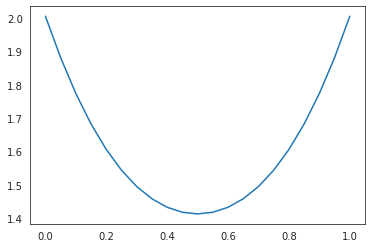

In [ ]:
rmse_vals=[]
chart_val = []
w = np.linspace(0,1,21)
for i in w:
  
    x=np.array(pred)*i 
    y=np.array(pred2)*(1-i)
    pred4=x*y
    rmse = np.sqrt(np.mean((pred4 - y_test.to_numpy())**2))
    chart_val.append([i, rmse])
    rmse_vals.append(rmse)
chart_val_np = np.array(chart_val)
plt.plot(chart_val_np[:, 0], chart_val_np[:,1])